<a href="https://colab.research.google.com/github/shahtvisha/Brain-AI-exploration/blob/main/NeuralDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scipy

In [ ]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from sklearn.preprocessing import StandardScaler

Loading the dataset and exploring the data

In [ ]:
mat_data = scipy.io.loadmat('/content/CLA-SubjectJ-170508-3St-LRHand-Inter.mat')

print(mat_data.keys())

for key in mat_data.keys():
    print(f'Contents of {key}:')
    print(mat_data[key])

dict_keys(['__header__', '__version__', '__globals__', 'ans', 'o', 'x'])
Contents of __header__:
b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Mon Apr 23 22:31:25 2018'
Contents of __version__:
1.0
Contents of __globals__:
[]
Contents of ans:
[[23.56322702]]
Contents of o:
[[(array(['201705081338.32BEA9DD'], dtype='<U21'), array([], dtype='<U1'), array([[621892]], dtype=int32), array([[200]], dtype=uint8), array([[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]], dtype=uint8), array([[ 0],
         [ 0],
         [ 0],
         ...,
         [92],
         [92],
         [92]], dtype=uint8), array([[-18. , -19.2, -12. , ...,  -6. ,  -8.4,  -1.2],
         [ -3.6,  -0. ,   1.8, ...,   5.4,   7.2,  -1.2],
         [ -6.6,  -8.4,  -1.2, ...,   3. ,   3. ,  -1.8],
         ...,
         [ -9. ,  -8.4,   2.4, ...,   5.4,   4.8,  -0. ],
         [ -7.2, -11.4,   3.6, ...,   4.2,   6.6,  -0. ],
         [ -2.4,  -9. ,   5.4, ...,   3.6,   6. ,  -

In [ ]:
# Extract contents of keys 'ans', 'o', and 'x'
ans_data = mat_data['ans']
o_data = mat_data['o']
x_data = mat_data['x']

# Display the shapes of the extracted data arrays
print(f'Shape of ans_data: {ans_data.shape}')
print(f'Shape of o_data: {o_data.shape}')
print(f'Shape of x_data: {x_data.shape}')

# Print a sample of the data
print('Sample data from ans_data:')
print(ans_data[:5])
print('Sample data from o_data:')
print(o_data[:5])
print('Sample data from x_data:')
print(x_data[:5])


Shape of ans_data: (1, 1)
Shape of o_data: (1, 1)
Shape of x_data: (533, 1)
Sample data from ans_data:
[[23.56322702]]
Sample data from o_data:
[[(array(['201705081338.32BEA9DD'], dtype='<U21'), array([], dtype='<U1'), array([[621892]], dtype=int32), array([[200]], dtype=uint8), array([[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]], dtype=uint8), array([[ 0],
         [ 0],
         [ 0],
         ...,
         [92],
         [92],
         [92]], dtype=uint8), array([[-18. , -19.2, -12. , ...,  -6. ,  -8.4,  -1.2],
         [ -3.6,  -0. ,   1.8, ...,   5.4,   7.2,  -1.2],
         [ -6.6,  -8.4,  -1.2, ...,   3. ,   3. ,  -1.8],
         ...,
         [ -9. ,  -8.4,   2.4, ...,   5.4,   4.8,  -0. ],
         [ -7.2, -11.4,   3.6, ...,   4.2,   6.6,  -0. ],
         [ -2.4,  -9. ,   5.4, ...,   3.6,   6. ,  -0. ]]), array([[array(['Fp1'], dtype='<U3')],
         [array(['Fp2'], dtype='<U3')],
         [array(['F3'], dtype='<U2')],
         [arr

In [ ]:
# Extract the contents of the 'o' key
o_data_contents = o_data[0, 0]

# Display the contents of the 'o' key
#print('Contents of o_data:')
#print(o_data_contents)


In [ ]:
eeg_signals = o_data_contents[5]

print('Shape of EEG signals array:', eeg_signals.shape)


Shape of EEG signals array: (621892, 1)


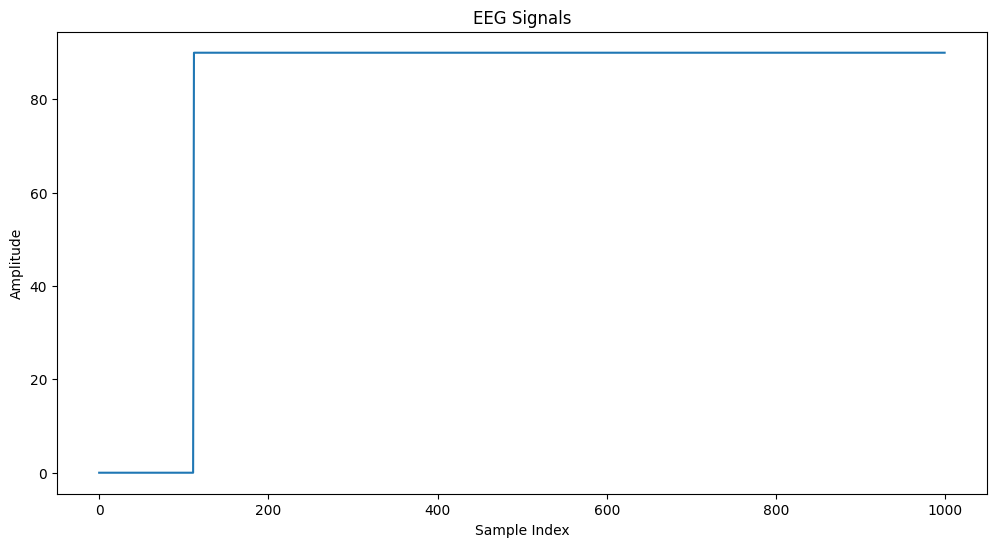

In [ ]:
import matplotlib.pyplot as plt

eeg_data = eeg_signals[:, 0]

plt.figure(figsize=(12, 6))
plt.plot(eeg_data[:1000])
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.title('EEG Signals')
plt.show()


Shape of EEG signals array: (621892, 22)
Shape of ans_data: (1, 1)
Shape of x_data: (533, 1)


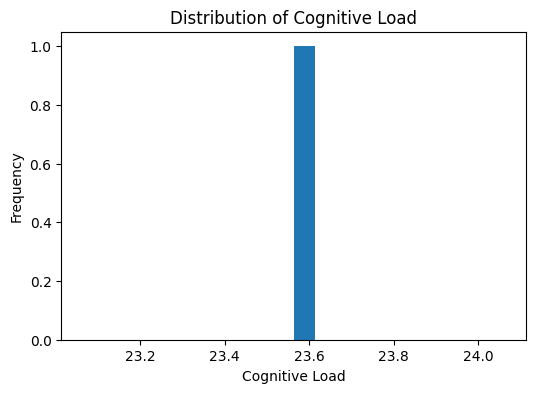

In [ ]:
print("Shape of EEG signals array:", eeg_signals.shape)
print("Shape of ans_data:", ans_data.shape)
print("Shape of x_data:", x_data.shape)

# Visualize the distribution of cognitive load values
plt.figure(figsize=(6, 4))
plt.hist(ans_data.flatten(), bins=20)
plt.title("Distribution of Cognitive Load")
plt.xlabel("Cognitive Load")
plt.ylabel("Frequency")
plt.show()

In [ ]:
def preprocess_eeg_signals(eeg_signals):
    fs = 200
    lowcut = 0.5  # Low cutoff frequency in Hz
    highcut = 50.0  # High cutoff frequency in Hz

    # Convert critical frequencies to normalized frequencies
    nyquist = 0.5 * fs
    lowcut_norm = lowcut / nyquist
    highcut_norm = highcut / nyquist

    order = 5  # Filter order

    # Design the Butterworth bandpass filter
    b, a = signal.butter(order, [lowcut_norm, highcut_norm], btype='band')

    # Apply the filter to the EEG signals
    preprocessed_signals = signal.filtfilt(b, a, eeg_signals, axis=0)

    return preprocessed_signals

In [ ]:
preprocessed_signals = preprocess_eeg_signals(eeg_signals)

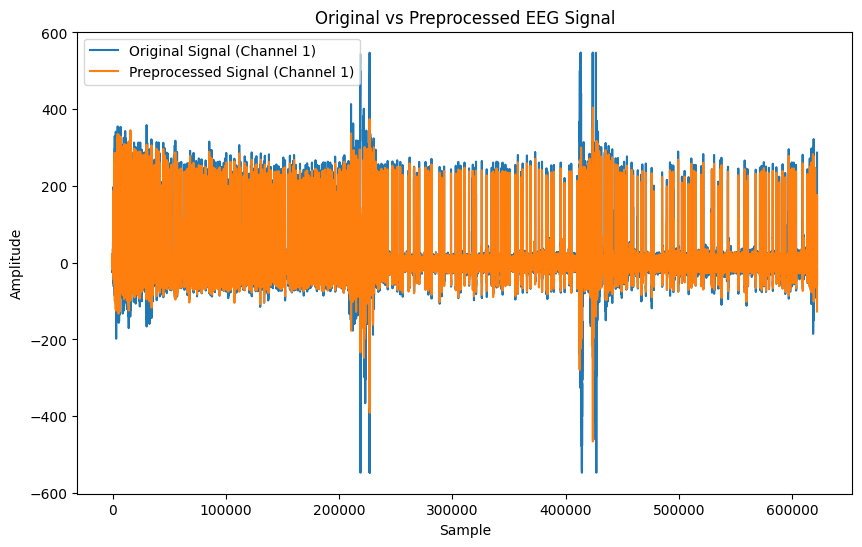

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(eeg_signals[:, 0], label='Original Signal (Channel 1)')
plt.plot(preprocessed_signals[:, 0], label='Preprocessed Signal (Channel 1)')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.title('Original vs Preprocessed EEG Signal')
plt.legend()
plt.show()

In [ ]:
def detect_spikes(eeg_signals):
    # Set threshold for spike detection
    threshold = 3.0  # Example threshold value

    # Calculate mean and standard deviation of EEG signals
    mean_signal = np.mean(eeg_signals)
    std_signal = np.std(eeg_signals)

    # Find spike times based on threshold crossing
    spike_indices = np.where(eeg_signals > mean_signal + threshold * std_signal)[0]
    spike_times = spike_indices / 200.0  # Convert indices to time (assuming 200 Hz sampling rate)

    return spike_times

In [ ]:
def compute_coherence(eeg_signals1, eeg_signals2):
    # Compute coherence between two neural signals using Welch's method
    f, coherence = signal.coherence(eeg_signals1, eeg_signals2, fs=200, nperseg=1024)

    return f, coherence

In [ ]:
def visualize_data(eeg_signals, spike_times, f, coherence):
    # Visualize filtered EEG signals
    plt.figure(figsize=(12, 6))
    plt.plot(eeg_signals)
    plt.title('Filtered EEG Signals')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.show()

    # Visualize spike times
    plt.figure(figsize=(12, 4))
    plt.eventplot(spike_times, color='r', linewidths=2)
    plt.title('Spike Train')
    plt.xlabel('Time')
    plt.ylabel('Neuron')
    plt.show()

    # Visualize coherence
    plt.figure(figsize=(8, 6))
    plt.plot(f, coherence)
    plt.title('Coherence between EEG Signals')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Coherence')
    plt.show()


In [ ]:
preprocessed_signals = preprocess_eeg_signals(eeg_signals)
spike_times = detect_spikes(preprocessed_signals[:, 0])
f, coherence = compute_coherence(preprocessed_signals[:, 0], eeg_signals[:, 0])

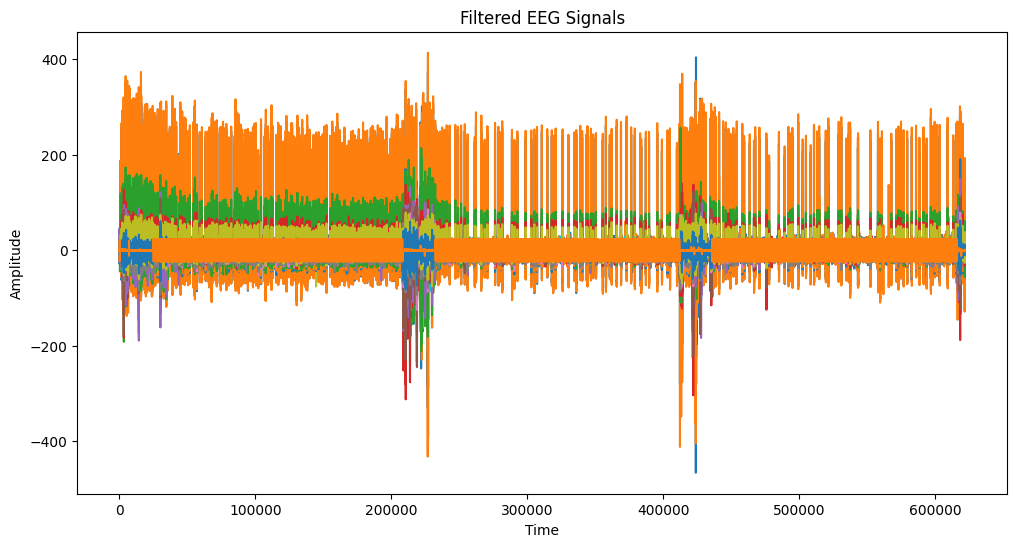

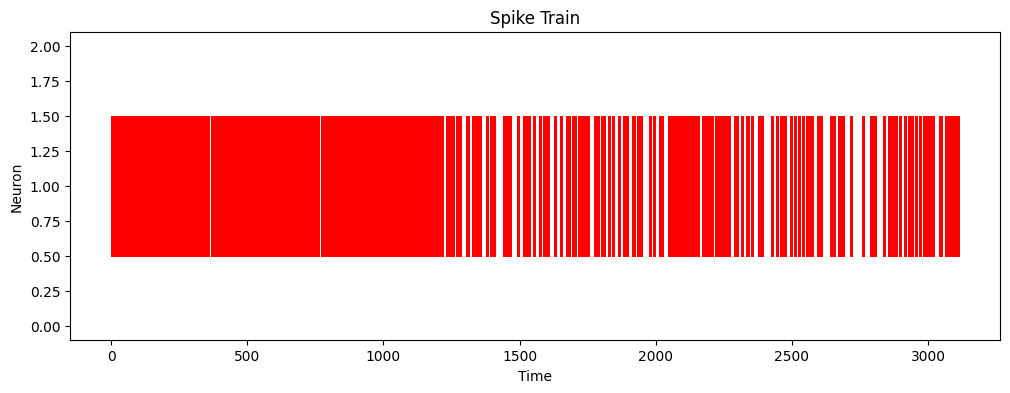

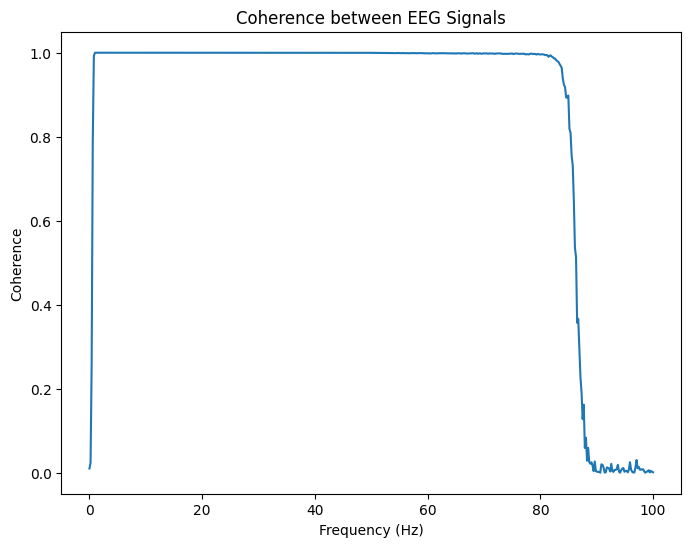

In [ ]:
visualize_data(preprocessed_signals, spike_times, f, coherence)

Applying Linear Regression

In [ ]:
def extract_features(eeg_signal):
    # Extract statistical features (mean, variance)
    mean = np.mean(eeg_signal)
    variance = np.var(eeg_signal)

    # Check if the length of the EEG signal is smaller than nperseg
    nperseg = min(len(eeg_signal), 1024)

    # Extract spectral features using Welch's method
    f, psd = welch(eeg_signal, fs=200, nperseg=nperseg)
    total_power = np.sum(psd)  # Total power in the spectrum

    # Combine all features into a single list
    features = [mean, variance, total_power]

    return features


In [ ]:
X = []
y = []

for i in range(len(eeg_signals)):
    features = extract_features(eeg_signals[i, :])  # Pass a single EEG signal to the function
    X.append(features)
    y.append(ans_data[0][0])

X = np.array(X)
y = np.array(y)

In [ ]:
X, y

(array([[-11.91818182,  52.4714876 ,   4.66362131],
        [  3.21818182,  32.15603306,   4.31422549],
        [  1.44545455,  23.12702479,   2.19753835],
        ...,
        [  0.95454545,  49.70157025,   7.14498221],
        [  3.10909091,  42.33719008,   3.88237177],
        [  4.09090909,  37.0353719 ,   4.30846339]]),
 array([23.56322702, 23.56322702, 23.56322702, ..., 23.56322702,
        23.56322702, 23.56322702]))

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 1.2621774483536189e-27


In [ ]:
cv_mse = -cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_r2 = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

In [ ]:
print("Cross-Validation Mean Squared Error:", cv_mse.mean())
print("Cross-Validation R-squared Score:", cv_r2.mean())


Cross-Validation Mean Squared Error: 9.365356666783853e-28
Cross-Validation R-squared Score: 0.0


In [ ]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Test Set Mean Squared Error:", mse)
print("Test Set R-squared Score:", r2)

Test Set Mean Squared Error: 1.2621774483536189e-27
Test Set R-squared Score: 0.0
